In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from keras_preprocessing import image


In [16]:
train_dir = "../../dataset/face_rec/original_images/og/"
# Create the ImageDataGenerator with validation_split
generator = ImageDataGenerator(validation_split=0.2)  # 20% for validation

# Load training data
train_ds = generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training'  # Use the training subset
)

# Load validation data
val_ds = generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation'  # Use the validation subset
)

classes = list(train_ds.class_indices.keys())

Found 2060 images belonging to 31 classes.
Found 502 images belonging to 31 classes.


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))


In [18]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,071 (965.12 KB)

 Trainable params: 246,495 (962.87 KB)

 Non-trainable params: 576 (2.25 KB)

In [19]:
model.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds,
    steps_per_epoch=100,  # Limit to 100 steps per epoch
    validation_steps=50,  # Limit validation steps
)


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.0609 - loss: 3.7400 - val_accuracy: 0.0538 - val_loss: 4.2137
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.2253 - loss: 2.7664 - val_accuracy: 0.1096 - val_loss: 3.3487
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 968ms/step - accuracy: 0.3584 - loss: 2.2073 - val_accuracy: 0.1972 - val_loss: 3.0097
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.4777 - loss: 1.7660 - val_accuracy: 0.2689 - val_loss: 2.7887
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.5934 - loss: 1.3961 - val_accuracy: 0.2610 - val_loss: 2.9183
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6998 - loss: 1.0800 - val_accuracy: 0.2530 - val_loss: 2.8293
Epoch 7/15
 56/100 ━━━━━━━━━━━━━━━━━━━━ 33s 772ms/step - accuracy: 0.7844 - loss: 0.8057

KeyboardInterrupt: 

In [ ]:
# Extract training and validation accuracy
train_acc = model.history.history['accuracy']  # Training accuracy
val_acc = model.history.history['val_accuracy']  # Validation accuracy

print(f"Final Training Accuracy: {train_acc[-1]:.2f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.2f}")


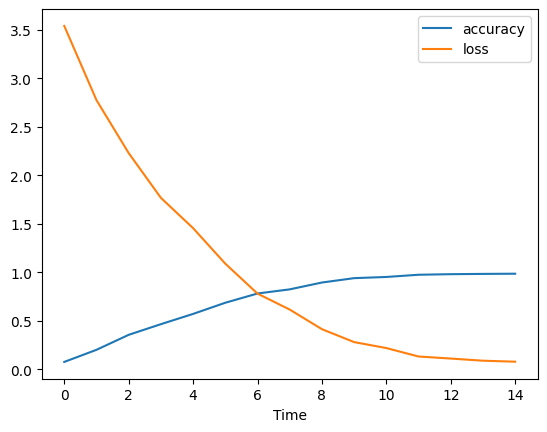

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [29]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])